# 1. 분석데이터 불러오기 및 확인

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = pd.read_csv('iris.csv')
iris_data = iris[iris.columns[0:4]]
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2. DBSCAN 모델 적용

In [5]:
from sklearn.cluster import DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.5,metric = 'euclidean',min_samples=5)
dbscan

DBSCAN()

In [7]:
dbscan.fit(iris_data)

DBSCAN()

In [8]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [9]:
pred = dbscan.fit_predict(iris_data)
pred=pd.DataFrame(pred)
pred.columns=['predict']
pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [10]:
match_data = pd.concat([iris,pred],axis=1)
match_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [11]:
cross = pd.crosstab(match_data['class'],match_data['predict'])
cross

predict,-1,0,1
class,,,
Iris-setosa,1,49,0
Iris-versicolor,6,0,44
Iris-virginica,10,0,40


# 3. 시각화

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(iris_data)
pca_2d = pca.transform(iris_data)

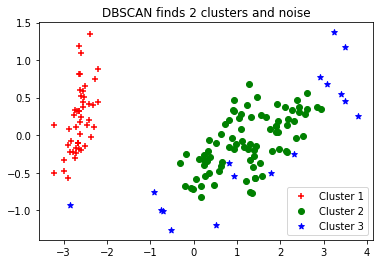

In [13]:
for i in range(0,pca_2d.shape[0]):
    if dbscan.labels_[i]==0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i]==1 :
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif dbscan.labels_[i]== -1 :
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
        
plt.legend([c1,c2,c3],['Cluster 1','Cluster 2','Cluster 3', 'Noise'])
plt.title("DBSCAN finds 2 clusters and noise")
plt.show()